#            DYKSTRA-PARSONS WATERFLOOD PREDICTION METHOD
This program is written to predict waterflood performance using the traditional Dykstra-Parsons discrete analytical technique.
The step-by-step procedure is as follows
Step 1: Permeability arrangement/ordering
Step 2: Calculate the mobility ratio M.
Step 3: Determine the distances the flood has advanced in the jth layer (j > n), when the nth layer has just broken through.
Step 4: Calculate the coverage, Cn
Step 5: Compute the water-oil ratio.
Step 6: Compute the Cumulative oil recovery, N_pn.
Step 7: Compute the cumulative water produced, Wp.
Step 8: Compute the volume of water require to fill-up the gas space, Wf
Step 9: Compute the water injected, Wi.
Step 10: Compute the time to reach a given recovery, t

##   #Reservoir and Process Data.

In [95]:
   #Reservoir and Process Data.
#L = input('Enter the lenght of the reservoir bed\n')
Length_of_bed_ft = 2896

#w = input('Enter the width of the reservoir bed\n')
width_of_bed_ft = 2000

#Average Porosity = input('Enter the average porosity of the reservoir\n')
average_porosity = 0.25

#VISO = input('Enter the oil viscosity\n')
VISO = 3.6

#VISW = input('Enter the water viscosity\n')
VISW = 0.95

#OFVF = input('Enter the oil formation volume factor\n')
OFVF = 1.11

#WFVF = input('Enter the water formation volume factor\n')
WFVF = 1.01

#SWI = input('Enter the initial water saturation\n')
SWI = 0.2

#SGI = input('Enter the initial gas saturation\n')
SGI = 0.16

#SOI = input('Enter the initial oil saturation\n')
SOI = 0.65

#SOR = input('Enter the residual oil saturation\n')
SOR = 0.35

#Residual gas saturation in unswept area
Residual_gas_saturation_unswept_area = 0.06

#Residual gas saturation in swept area
Residual_gas_saturation_swept_area = 0.02

#Residual gas saturation in in reservoir
Residual_gas_saturation = Residual_gas_saturation_unswept_area+Residual_gas_saturation_swept_area

#Constant Injection Rate in STB/D
Constant_injection_rate = 1800

#Injection Pressure Differential in PSI
Inj_Pressure_differential = 700

## Setting the dataframe for bed data.

In [96]:
# And inputs the bed permeability, porosity, and thickness data.
import pandas as pd
bed_data = pd.read_csv('Permeability_Porosity_distribution_data.csv')

## ARRANGING THE DATA IN ORDER OF DECREASING PERMEABILITY

In [97]:

# ARRANGING THE DATA IN ORDER OF DECREASING PERMEABILITY.
bed_data_sort = bed_data.sort_values(by='PERMEABILITY', ascending=False) 
bed_data_sort

,LAYER,DEPTH,THICKNESS,PERMEABILITY,POROSITY
6,7,4371.5,1,9230,0.322
5,6,4369.5,1,5940,0.305
8,9,4375.5,1,3080,0.322
7,8,4373.5,1,2860,0.306
4,5,4367.5,1,2790,0.311
10,11,4379.5,1,2370,0.323
3,4,4365.5,1,1464,0.309
9,10,4377.5,1,594,0.297
0,1,4359.5,1,593,0.301
11,12,4381.5,1,526,0.286


## Importing the Relative permeability Data

In [98]:
#Importing the Relative permeability Data
import pandas as pd
RPERM_data = pd.read_csv('Oil_Water_Relative_Permeability_data.csv')
RPERM_data

,SW,KRW,KRO
0,0.20,0.000,1.000
1,0.25,0.003,0.680
2,0.30,0.008,0.460
3,0.35,0.018,0.320
4,0.40,0.035,0.200
5,0.45,0.054,0.124
6,0.50,0.080,0.071
7,0.55,0.105,0.038
8,0.60,0.140,0.017
9,0.65,0.180,0.000


## Extracting input variables from data table.

In [99]:

# Extracting input variables from data table.
import numpy as np
#Col_Poro = input('Enter the column number of POROSITY\n')
#Col_Poro = 5
#PORO = bed_data.iloc[:,Col_Poro-1]
PORO = np.array(bed_data_sort['POROSITY'])
permeability_array = np.array(bed_data_sort['PERMEABILITY'])
h = np.array(bed_data_sort['THICKNESS'])
SW = np.array(RPERM_data['SW'])
KRW = np.array(RPERM_data['KRW'])
KRO = np.array(RPERM_data['KRO'])

## This code calculates the permeability ratio, ki/kn

In [100]:
#This code calculates the permeability ratio, ki/kn
List_of_permeability_ratio = []
for permeability_index in range(len(permeability_array)):
    List_of_permeability_ratio_subset = [][:-permeability_index]
    for index,permeability in enumerate(permeability_array):
        if permeability_index <= index:
            permaebility_ratio = permeability/permeability_array[permeability_index]
            List_of_permeability_ratio_subset.append(permaebility_ratio)
    List_of_permeability_ratio.append(List_of_permeability_ratio_subset)

### Converting the list of permeability ratio to dataframe table.

In [101]:
List_of_permeability_ratio_DataTable = pd.DataFrame(List_of_permeability_ratio).transpose() 
List_of_permeability_ratio_DataTable

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000,1.0
1,0.643554,0.518519,0.928571,0.975524,0.849462,0.617722,0.405738,0.998316,0.887015,0.950570,0.732,NaN
2,0.333694,0.481481,0.905844,0.828671,0.524731,0.250633,0.405055,0.885522,0.843170,0.695817,NaN,NaN
3,0.309859,0.469697,0.769481,0.511888,0.212903,0.250211,0.359290,0.841751,0.617201,NaN,NaN,NaN
4,0.302275,0.398990,0.475325,0.207692,0.212545,0.221941,0.341530,0.616162,NaN,NaN,NaN,NaN
5,0.256771,0.246465,0.192857,0.207343,0.188530,0.210970,0.250000,NaN,NaN,NaN,NaN,NaN
6,0.158613,0.100000,0.192532,0.183916,0.179211,0.154430,NaN,NaN,NaN,NaN,NaN,NaN
7,0.064355,0.099832,0.170779,0.174825,0.131183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.064247,0.088552,0.162338,0.127972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.056988,0.084175,0.118831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## CALCULATION OF SINGLE DATA PARAMETERS

### Calculating the average porosity

In [102]:
# Calculating the average porosity
average_porosity = np.mean(bed_data_sort.POROSITY)
average_porosity

0.30441666666666667

### RELATIVE PERMEABILITY OF WATER AT 1-SOR.

In [103]:
# RELATIVE PERMEABILITY OF WATER AT 1-SOR.
KRW_1_SOR = RPERM_data.loc[RPERM_data.SW == 1-SOR,'KRW'].values[0]
KRW_1_SOR

0.18

### RELATIVE PERMEABILITY OF OIL AT INITIAL WATER SATURATION.

In [104]:
# RELATIVE PERMEABILITY OF OIL AT INITIAL WATER SATURATION.
KRO_SWI = RPERM_data.loc[RPERM_data.SW == SWI,'KRO'].values[0]
KRO_SWI

1.0

### CALCULATING THE WATER MOBILITY

In [105]:
#CALCULATING THE WATER MOBILITY

Water_Mobility = permeability_array*KRW_1_SOR/VISW
Water_Mobility

array([1748.84210526, 1125.47368421,  583.57894737,  541.89473684,
        528.63157895,  449.05263158,  277.38947368,  112.54736842,
        112.35789474,   99.66315789,   94.73684211,   69.34736842])

### CALCULATING THE OIL MOBILITY

In [106]:
#CALCULATING THE WATER MOBILITY

Oil_Mobility = permeability_array*KRO_SWI/VISO
Oil_Mobility

array([2563.88888889, 1650.        ,  855.55555556,  794.44444444,
        775.        ,  658.33333333,  406.66666667,  165.        ,
        164.72222222,  146.11111111,  138.88888889,  101.66666667])

### CALCULATING THE MOBILITY RATIO, M.

In [107]:
# CALCULATING THE MOBILITY RATIO, M.
import math
Mobility_Ratio = KRW_1_SOR*VISO/(KRO_SWI*VISW)

Mobility_Ratio

0.6821052631578948

### CALCULATING THE AREAL SWEEP EFFICIENCY AT BREAKTHROUGH

In [108]:
#CALCULATING THE AREAL SWEEP EFFICIENCY AT BREAKTHROUGH
Areal_sweep_efficiency_at_breakthrough = 0.54602036+(0.03170817/Mobility_Ratio)+(0.30222997/math.exp(Mobility_Ratio)-0.0050969*Mobility_Ratio)
Areal_sweep_efficiency_at_breakthrough

0.7418223111903616

### CALCULATING AREA OF RESERVOIR IN ACRES.

In [109]:
#CALCULATING AREA OF RESERVOIR IN ACRES.
Area_acres = Length_of_bed_ft*width_of_bed_ft/43560
Area_acres

132.9660238751148

### CALCULATING THE GROSS ROCK VOLUME.

In [110]:
#CALCULATING THE GROSS ROCK VOLUME.
Gross_rock_volume_acre_ft = Area_acres*bed_data_sort.THICKNESS.sum()
Gross_rock_volume_acre_ft

1595.5922865013774

### CALCULATING DISPLACEMENT EFFICIENCY

In [111]:
#CALCULATING DISPLACEMENT EFFICIENCY
Displacement_efficiency = (1-SWI-SGI-SOR)/(1-SWI-SGI)
Displacement_efficiency

0.45312500000000006

### CALCULATING THE AREAL SWEEP EFFICIENCY

In [112]:
#CALCULATING THE AREAL SWEEP EFFICIENCY
Areal_sweep_efficiency = Areal_sweep_efficiency_at_breakthrough+0.2749*np.log((1/Displacement_efficiency))
Areal_sweep_efficiency

0.9594296471426536

## CALCULATION OF TABULAR VARIABLES

### EXTRACTING THE SORTED LAYER COLUMN

In [113]:
# EXTRACTING THE SORTED LAYER COLUMN
Layer_column = bed_data_sort['LAYER'].to_numpy()
Layer_table =  pd.DataFrame(Layer_column, columns = ['LAYERS'])
Layer_table

,LAYERS
0,7
1,6
2,9
3,8
4,5
5,11
6,4
7,10
8,1
9,12


In [114]:
#This code calculates the list of waterflood front location as each layer breaksthrough
Front_Location_list = []
for permeability_index1 in range(len(permeability_array)):
    #Front_Location_list = []
    Front_Location = (Mobility_Ratio - np.sqrt(Mobility_Ratio**2+List_of_permeability_ratio_DataTable[permeability_index1]*(1-Mobility_Ratio**2)))/(Mobility_Ratio-1)
    Front_Location_list.append(Front_Location)

#This code generates table of flood front location as the layers breakthrough
Front_Location_list_DataTable = pd.DataFrame(Front_Location_list).transpose().rename(columns={0:'FLOOD FRONT LOCATION OF EACH BED'})  #.style.set_caption("FLOOD FRONT LOCATION AS EACH LAYER BREAKSTHROUGH")
Front_Location_list_DataTable

,FLOOD FRONT LOCATION OF EACH BED,1,2,3,4,5,6,7,8,9,10,11
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
1,0.684376,0.564967,0.939340,0.979347,0.870734,0.660123,0.452559,0.998584,0.903493,0.958149,0.765886,NaN
2,0.378134,0.528574,0.919787,0.852443,0.571024,0.289506,0.451863,0.902197,0.865210,0.732820,NaN,NaN
3,0.353023,0.516890,0.799747,0.558488,0.248164,0.289047,0.404824,0.863963,0.659631,NaN,NaN,NaN
4,0.344980,0.445679,0.522476,0.242398,0.247768,0.258132,0.386335,0.658651,NaN,NaN,NaN,NaN
5,0.296166,0.284973,0.225906,0.242011,0.221074,0.246027,0.288818,NaN,NaN,NaN,NaN,NaN
6,0.187391,0.119950,0.225543,0.215910,0.210634,0.182643,NaN,NaN,NaN,NaN,NaN,NaN
7,0.077936,0.119753,0.201147,0.205704,0.156075,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.077807,0.106542,0.191611,0.152382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.069153,0.101394,0.141834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
# CALCULATING THE OIL FLOW RATE IN EACH BED AS EACH BED BREAKS THROUGH
Water_Flowrate_per_bed = (width_of_bed_ft*bed_data_sort['THICKNESS']*Inj_Pressure_differential/Length_of_bed_ft)*Water_Mobility
    
Water_Flowrate_per_bed_table = pd.DataFrame(Water_Flowrate_per_bed).rename(columns={'THICKNESS':'INJECTED WATER FLOWRATE(STB/D)'})
Water_Flowrate_per_bed_table

,INJECTED WATER FLOWRATE(STB/D)
6,845434.719395
5,544082.582146
8,282116.894446
7,261965.687700
4,255553.940099
10,217083.454493
3,134097.121256
9,54408.258215
0,54316.661820
11,48179.703402


In [116]:
# CALCULATING THE OIL FLOW RATE IN EACH BED AS EACH BED BREAKS THROUGH
Oil_Flowrate_per_bed_list = []
for bed in Front_Location_list_DataTable.columns:
    Oil_Flowrate_per_bed = (width_of_bed_ft*bed_data_sort['THICKNESS']*Inj_Pressure_differential/Length_of_bed_ft)*Water_Mobility/((1-Mobility_Ratio)*Front_Location_list_DataTable[bed]+Mobility_Ratio)
    Oil_Flowrate_per_bed_list.append(Oil_Flowrate_per_bed)
    
    
Oil_Flowrate_per_bed_table = pd.DataFrame(Oil_Flowrate_per_bed_list).transpose().rename(columns={0:'OIL IN EACH BED FLOWRATE(STB/D)'})
Oil_Flowrate_per_bed_table

,OIL IN EACH BED FLOWRATE(STB/D),1,2,3,4,5,6,7,8,9,10,11
0,5.431666e+04,5.431666e+04,5.431666e+04,5.431666e+04,5.431666e+04,5.431666e+04,54316.661820,54316.661820,54316.661820,54316.661820,54316.661820,54316.66182
1,5.090585e+04,5.314832e+04,4.669871e+04,4.610087e+04,4.776083e+04,5.134587e+04,55447.681674,45818.825372,47247.705805,46415.726952,49480.730095,NaN
2,4.178458e+04,3.943402e+04,3.440149e+04,3.517422e+04,3.881783e+04,4.330532e+04,40598.572355,34600.026310,35025.068549,36635.959555,NaN,NaN
3,1.688180e+05,1.584283e+05,1.432140e+05,1.559911e+05,1.762128e+05,1.732539e+05,165389.314751,140158.348418,150367.041325,NaN,NaN,NaN
4,3.227618e+05,3.102195e+05,3.012906e+05,3.366262e+05,3.358710e+05,3.344229e+05,317490.212150,286660.291456,NaN,NaN,NaN,NaN
5,7.009072e+05,7.041347e+05,7.216720e+05,7.168044e+05,7.231453e+05,7.156006e+05,703022.601272,NaN,NaN,NaN,NaN,NaN
6,1.139898e+06,1.173829e+06,1.121557e+06,1.126132e+06,1.128654e+06,1.142222e+06,NaN,NaN,NaN,NaN,NaN,NaN
7,3.705939e+05,3.637532e+05,3.511375e+05,3.504570e+05,3.580132e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,3.991242e+05,3.940321e+05,3.796909e+05,3.861723e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,7.727472e+04,7.616599e+04,7.481950e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
# CALCULATING THE VERTICAL COVERAGE
coverage_list = []
Total_Number_of_layers = len(permeability_array)-1
for number_layer_breakthrough in range(len(permeability_array)):
    coverage_individual = (number_layer_breakthrough+((Total_Number_of_layers-number_layer_breakthrough)*Mobility_Ratio/(Mobility_Ratio-1))-(1/(Mobility_Ratio-1))*np.sqrt(Mobility_Ratio**2+List_of_permeability_ratio_DataTable[number_layer_breakthrough][1:]*(1-Mobility_Ratio**2)).sum())/Total_Number_of_layers
    coverage_list.append(coverage_individual)
coverage_list

#Table of vertical coverage of the reservoir when a given layer just broke through.
coverage_table = pd.DataFrame(coverage_list, columns=['VERTICAL COVERAGE (FRACTION)'])
coverage_table

,VERTICAL COVERAGE (FRACTION)
0,0.234827
1,0.351218
2,0.560672
3,0.586244
4,0.593225
5,0.629589
6,0.725855
7,0.947581
8,0.948030
9,0.971906


In [118]:
# Calculating the ratio at the denomintor of the water-oil ratio equation.
WOR_denominator_ratio_list = []
for denominator_index in range(len(permeability_array)):
    WOR_denominator_ratio = permeability_array/np.sqrt(Mobility_Ratio**2+List_of_permeability_ratio_DataTable[denominator_index]*(1-Mobility_Ratio**2))
    WOR_denominator_ratio_list.append(WOR_denominator_ratio)
WOR_denominator_ratio_table = pd.DataFrame(WOR_denominator_ratio_list).transpose()
WOR_denominator_ratio_table

# CALCULATING THE WATER OIL RATIO, WORn and generate table
WOR_list = []
sum_of_permeability = sum(bed_data_sort.PERMEABILITY)
for number_layer_breakthrough in range(len(permeability_array)):
    WOR = sum_of_permeability/(WOR_denominator_ratio_table[number_layer_breakthrough].sum())
    WOR_list.append(WOR)
WOR_table = pd.DataFrame(WOR_list,columns=['WATER-OIL RATIO'])
WOR_table

,WATER-OIL RATIO
0,0.854250
1,0.873332
2,0.941558
3,0.943692
4,0.937548
5,0.938210
6,1.003496
7,1.238763
8,1.391597
9,1.628333


In [119]:
#CALCULATING THE CUMULATIVE OIL RECOVERY AS EACH BED BREAKSTHROUGH.
Cumulative_oil_recovery = (7758*Areal_sweep_efficiency_at_breakthrough*Gross_rock_volume_acre_ft*average_porosity*(SOI-SOR)*coverage_table/OFVF).rename(columns={'VERTICAL COVERAGE (FRACTION)':'CUMULATIVE OIL RECOVERY (BARRELS)'})
Cumulative_oil_recovery

,CUMULATIVE OIL RECOVERY (BARRELS)
0,177413.734235
1,265347.440426
2,423591.340534
3,442911.105623
4,448185.308814
5,475658.600786
6,548387.917254
7,715904.046134
8,716243.327635
9,734281.638706


In [120]:
#CALCULATING THE VOLUME OF WATER REQUIRED TO FILL-UP THE GAS SPACE.
Water_volume_to_fillup_gas_space = 7758*Area_acres*bed_data_sort.THICKNESS*bed_data_sort.POROSITY*(SGI-Residual_gas_saturation)
Water_volume_to_fillup_gas_space_table=pd.DataFrame(Water_volume_to_fillup_gas_space, columns = ['WATER VOLUME FOR GAS SPACE FILL-UP'])
Water_volume_to_fillup_gas_space_table

,WATER VOLUME FOR GAS SPACE FILL-UP
6,26572.738645
5,25169.830083
8,26572.738645
7,25252.354116
4,25664.974281
10,26655.262678
3,25499.926215
9,24509.637818
0,24839.733950
11,23601.873455


In [121]:
#CALCULATING THE PRODUCING WATER-OIL RATIO
Producing_water_oil_ratio = (WOR_table*OFVF).rename(columns={'WATER-OIL RATIO':'PRODUCING WATER-OIL RATIO'})
Producing_water_oil_ratio

,PRODUCING WATER-OIL RATIO
0,0.948217
1,0.969398
2,1.045130
3,1.047498
4,1.040679
5,1.041413
6,1.113881
7,1.375027
8,1.544673
9,1.807449


In [122]:
# Note that the integration for the calculation of the cumulative oil produced starts from 0
# Hence, a new row will have to be inserted at the first row with element 0
# this is done for both the producing water-oil ratio and the cumulative oil produced.

# for the cumulative oil recovery
Cumulative_oil_recovery.loc[-1] = [0]  # adding a row
#Cumulative_oil_recovery.index = Cumulative_oil_recovery.index + 1  # shifting index
Cumulative_oil_recovery_Starting_from_0 = Cumulative_oil_recovery.sort_index()  # sorting by index

# for the producing water-oil ratio
Producing_water_oil_ratio.loc[-1] = [0]  # adding a row
#Producing_water_oil_ratio.index = Producing_water_oil_ratio.index + 1  # shifting index
Producing_water_oil_ratio_Starting_from_0 = Producing_water_oil_ratio.sort_index()  # sorting by index

In [123]:
# CALCULATING THE CUMULATIVE WATER PRODUCTION

# To determine the cumulative water production, the produced water oil ratio is ingreated against the cumulative oil recovery.
# The integration uses a cumulative trapezoidal row by row integration.

# import numpy and scipy.integrate.cumtrapz 
import numpy as np 
from scipy import integrate

# Preparing the Integration variables y, x.
   # the to.numpy() method converts from dataframe to numpy array which appears in the form of list of lists in the array. 
   #The concatenate function helps to bring the list of lists together.
x = np.concatenate(Cumulative_oil_recovery_Starting_from_0.to_numpy(),axis=0)
y = np.concatenate(Producing_water_oil_ratio_Starting_from_0.to_numpy(),axis=0) 

# using scipy.integrate.cumtrapz() method 
Cumulative_water_produced = pd.DataFrame(integrate.cumtrapz(y, x), columns = ['CUMULATIVE WATER PRODUCED'])
Cumulative_water_produced


,CUMULATIVE WATER PRODUCED
0,84113.366853
1,168424.882376
2,327818.269115
3,348032.807710
4,353539.542126
5,382140.505177
6,460517.039924
7,668983.104641
8,669478.404647
9,699711.714690


In [124]:
# CALCULATING THE CUMULATIVE WATER INJECTED, Wi

Cumulative_water_injected = (Cumulative_water_produced['CUMULATIVE WATER PRODUCED'] + OFVF*Cumulative_oil_recovery['CUMULATIVE OIL RECOVERY (BARRELS)'] + Water_volume_to_fillup_gas_space_table['WATER VOLUME FOR GAS SPACE FILL-UP']).drop([-1])
Cumulative_water_injected_table = pd.DataFrame(Cumulative_water_injected,columns = ['CUMULATIVE WATER INJECTED (BARRELS)'])
Cumulative_water_injected_table

,CUMULATIVE WATER INJECTED (BARRELS)
0,3.058823e+05
1,4.867275e+05
2,8.213590e+05
3,8.651641e+05
4,8.766902e+05
5,9.352914e+05
6,1.095800e+06
7,1.488889e+06
8,1.491081e+06
9,1.539274e+06


In [125]:
# CALCULATING THE TIME REQUIRED FOR INJECTION TO REACH A GIVEN RECOVERY.
Time_days = Cumulative_water_injected_table['CUMULATIVE WATER INJECTED (BARRELS)']/Constant_injection_rate
Time_days_table = pd.DataFrame(Time_days).rename(columns ={'CUMULATIVE WATER INJECTED (BARRELS)': 'Time (Days)'}, inplace = False)
#print(Time_days_table)
Time_years = Time_days_table/365
Time_years_table = Time_years.rename(columns ={'Time (Days)': 'Time (Years)'}, inplace = False)
#print(Time_years_table)

In [126]:
# TABLE OF ALL OBTAINED VALUES.

All_tables =pd.concat([Layer_table,Water_Flowrate_per_bed_table, coverage_table, WOR_table, Cumulative_oil_recovery, Water_volume_to_fillup_gas_space_table, Producing_water_oil_ratio, Cumulative_water_produced, Cumulative_water_injected_table, Time_days_table, Time_years_table,Front_Location_list_DataTable,Oil_Flowrate_per_bed_table], axis = 1).drop([-1])
All_tables

,LAYERS,INJECTED WATER FLOWRATE(STB/D),VERTICAL COVERAGE (FRACTION),WATER-OIL RATIO,CUMULATIVE OIL RECOVERY (BARRELS),WATER VOLUME FOR GAS SPACE FILL-UP,PRODUCING WATER-OIL RATIO,CUMULATIVE WATER PRODUCED,CUMULATIVE WATER INJECTED (BARRELS),Time (Days),...,2,3,4,5,6,7,8,9,10,11
0,7.0,54316.661820,0.234827,0.854250,177413.734235,24839.733950,0.948217,84113.366853,3.058823e+05,169.934637,...,5.431666e+04,5.431666e+04,5.431666e+04,5.431666e+04,54316.661820,54316.661820,54316.661820,54316.661820,54316.661820,54316.66182
1,6.0,45798.197150,0.351218,0.873332,265347.440426,23766.921521,0.969398,168424.882376,4.867275e+05,270.404146,...,4.669871e+04,4.610087e+04,4.776083e+04,5.134587e+04,55447.681674,45818.825372,47247.705805,46415.726952,49480.730095,NaN
2,9.0,33524.280314,0.560672,0.941558,423591.340534,23354.301355,1.045130,327818.269115,8.213590e+05,456.310532,...,3.440149e+04,3.517422e+04,3.881783e+04,4.330532e+04,40598.572355,34600.026310,35025.068549,36635.959555,NaN,NaN
3,8.0,134097.121256,0.586244,0.943692,442911.105623,25499.926215,1.047498,348032.807710,8.651641e+05,480.646701,...,1.432140e+05,1.559911e+05,1.762128e+05,1.732539e+05,165389.314751,140158.348418,150367.041325,NaN,NaN,NaN
4,5.0,255553.940099,0.593225,0.937548,448185.308814,25664.974281,1.040679,353539.542126,8.766902e+05,487.050116,...,3.012906e+05,3.366262e+05,3.358710e+05,3.344229e+05,317490.212150,286660.291456,NaN,NaN,NaN,NaN
5,11.0,544082.582146,0.629589,0.938210,475658.600786,25169.830083,1.041413,382140.505177,9.352914e+05,519.606323,...,7.216720e+05,7.168044e+05,7.231453e+05,7.156006e+05,703022.601272,NaN,NaN,NaN,NaN,NaN
6,4.0,845434.719395,0.725855,1.003496,548387.917254,26572.738645,1.113881,460517.039924,1.095800e+06,608.777982,...,1.121557e+06,1.126132e+06,1.128654e+06,1.142222e+06,NaN,NaN,NaN,NaN,NaN,NaN
7,10.0,261965.687700,0.947581,1.238763,715904.046134,25252.354116,1.375027,668983.104641,1.488889e+06,827.160528,...,3.511375e+05,3.504570e+05,3.580132e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1.0,282116.894446,0.948030,1.391597,716243.327635,26572.738645,1.544673,669478.404647,1.491081e+06,828.378465,...,3.796909e+05,3.861723e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,12.0,54408.258215,0.971906,1.628333,734281.638706,24509.637818,1.807449,699711.714690,1.539274e+06,855.152206,...,7.481950e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
# Generating fit equations for Produced water-oil ratio and Cumulative production
Polynomial_fit_2 = np.polyfit(np.concatenate(Cumulative_oil_recovery.to_numpy(),axis=0),np.concatenate(Producing_water_oil_ratio.to_numpy(),axis=0),2)
print ("y = {0}x^2 + {1}x + {2}".format(*Polynomial_fit_2))
Polynomial_fit_3 = np.polyfit(np.concatenate(Cumulative_oil_recovery.to_numpy(),axis=0),np.concatenate(Producing_water_oil_ratio.to_numpy(),axis=0),3)
print ("y = {0}x^3 + {1}x^2 + {2}x + {3}".format(*Polynomial_fit_3))
Exponential_fit = np.polyfit(np.concatenate(np.log(Cumulative_oil_recovery.to_numpy())),np.concatenate(Producing_water_oil_ratio.to_numpy()),1)
print ("lny = {0}x + ln({1})".format(*Exponential_fit))
print ("y = {1}*exp({0}x)".format(*Exponential_fit))

y = 2.7014610035831564e-12x^2 + 4.169724122456807e-07x + 0.3492703251610342
y = 3.378694455599838e-17x^3 + -3.708217588919566e-11x^2 + 1.2097855922714086e-05x + -0.08052580931328786


<ipython-input-127-c2858b3758a9>:6: RuntimeWarning: divide by zero encountered in log
  Exponential_fit = np.polyfit(np.concatenate(np.log(Cumulative_oil_recovery.to_numpy())),np.concatenate(Producing_water_oil_ratio.to_numpy()),1)
C:\ProgramData\Anaconda_test\lib\site-packages\numpy\lib\polynomial.py:630: RuntimeWarning: invalid value encountered in true_divide
  lhs /= scale


LinAlgError: SVD did not converge in Linear Least Squares

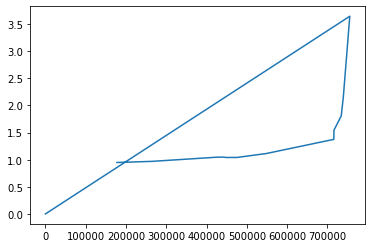

In [131]:
# Making a plot of Produced water-oil ratio and Cumulative production
import matplotlib.pyplot as plt
plt.plot(Cumulative_oil_recovery,Producing_water_oil_ratio)

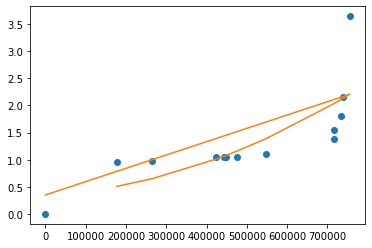

In [130]:
# Fitting the fit equations to the scatered plot of Produced water-oil ratio and Cumulative production
# Polynomial fit of degree 2
Polynomial_fit_2_list = np.poly1d(Polynomial_fit_2)
Polynomial_fit_2_y = Polynomial_fit_2_list(Cumulative_oil_recovery)
Polynomial_fit_2_Plot = plt.plot(Cumulative_oil_recovery, Producing_water_oil_ratio, "o", Cumulative_oil_recovery, Polynomial_fit_2_y)


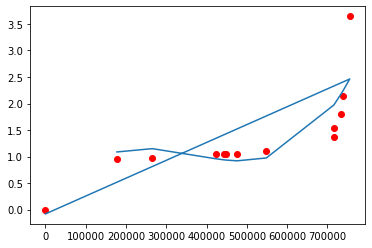

In [128]:
# Polynomial fit of degree 3
Polynomial_fit_3_list = np.poly1d(Polynomial_fit_3)
Polynomial_fit_3_y = Polynomial_fit_3_list(Cumulative_oil_recovery)
Polynomial_fit_3_Plot = plt.plot(Cumulative_oil_recovery, Producing_water_oil_ratio, "ro", Cumulative_oil_recovery, Polynomial_fit_3_y)

In [129]:
# Exponential fit
import scipy
from scipy.optimize import curve_fit
#scipy.optimize.curve_fit(lambda t,a,b: a*np.exp(b*t),  np.concatenate(Cumulative_oil_recovery.to_numpy(),axis=0),  np.concatenate(Producing_water_oil_ratio.to_numpy(),axis=0),  p0=(4, 0.1))


## PLOTTING OF DATA.

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (4,3), dpi = 100)
Water_oil_ratio_Coverage = plt.plot(WOR_table, coverage_table)
plt.setp(Water_oil_ratio_Coverage, animated=False, color = 'b', label='Coverage Vs WOR',linestyle = '-', linewidth = 1, marker = 'o', markersize = 2)
plt.title('Coverage versus Water-Oil Ratio', fontdict ={'fontname': 'Arial', 'fontsize': 20})
plt.xlabel(' Vertical Coverage')
plt.ylabel('Water-Oil Ratio')
plt.legend()
plt.show()
plt.savefig('WOR_Coverage_chart.pdf', dpi = 300)
plt.savefig('WOR_Coverage_chart.png', dpi = 300)


In [ ]:
import sviewgui.sview as sv
import pandas as pd

sv.buildGUI(All_tables)

In [ ]:
%matplotlib

In [ ]:
import matplotlib.pyplot as plt
for i in Layer_table['LAYERS']:
    plt.figure(figsize = (4,3), dpi = 100)
    Flood_front_location_Time = plt.plot(Time_days_table, Front_Location_list_DataTable[i-1], label = 'Layer'+str(i))
    #plt.setp(Flood_front_location_Time, animated=False, color = 'b', label='Coverage Vs WOR',linestyle = '-', linewidth = 1, marker = 'o', markersize = 2)
    plt.title('Flood front location versus Time', fontdict ={'fontname': 'Arial', 'fontsize': 20})
    plt.xlabel(' Time (days)')
    plt.ylabel('Flood front location')
    plt.legend()
    plt.show()
    plt.savefig('Flood_front_location.pdf', dpi = 300)
    plt.savefig('Flood_front_location.png', dpi = 300)


In [ ]:
plt.ion()